QUESTION 1: Student Performance 

In [1]:
import numpy as np
import pandas as pd

In [48]:
np.random.seed(42)
 
df = pd.DataFrame({
    "student_id": range(1, 501),
    "study_hours": np.random.randint(1, 10, 500),
    "attendance": np.random.randint(50, 100, 500),
    "exam_score": np.random.randint(30, 100, 500)
})

Basic inspection

In [4]:
df.head()


,student_id,study_hours,attendance,exam_score
0,1,7,80,37
1,2,4,68,34
2,3,8,93,58
3,4,5,88,76
4,5,7,76,97


In [5]:
df.tail()


,student_id,study_hours,attendance,exam_score
495,496,7,85,85
496,497,9,94,50
497,498,4,73,76
498,499,4,64,88
499,500,6,78,35


In [6]:
df.sample(5)


,student_id,study_hours,attendance,exam_score
161,162,6,97,67
382,383,6,62,71
345,346,3,80,40
297,298,7,62,95
52,53,6,72,38


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   500 non-null    int64
 1   study_hours  500 non-null    int64
 2   attendance   500 non-null    int64
 3   exam_score   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


# Feature engineering

In [8]:
df["performance"] = pd.cut(
    df["exam_score"],
    bins=[0, 50, 75, 100],
    labels=["Low", "Medium", "High"]
)

# Statistical analysis

In [49]:
df.describe()


,student_id,study_hours,attendance,exam_score
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4.906000,73.926000,64.308000
std,144.481833,2.612051,14.456227,19.808733
min,1.000000,1.000000,50.000000,30.000000
25%,125.750000,3.000000,61.000000,47.000000
50%,250.500000,5.000000,75.000000,65.000000
75%,375.250000,7.000000,86.000000,82.000000
max,500.000000,9.000000,99.000000,99.000000


In [50]:
df[["study_hours", "attendance", "exam_score"]].mean()

study_hours     4.906
attendance     73.926
exam_score     64.308
dtype: float64

In [ ]:
df[["study_hours", "attendance", "exam_score"]].mean()

# Group analysis

In [10]:
df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])

/tmp/ipykernel_15446/3319253712.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])


,mean,min,max,count
performance,,,,
Low,39.958904,30,50,146
Medium,62.881720,51,75,186
High,87.047619,76,99,168


# Filtering

In [51]:
high_performers = df[(df["study_hours"] > 6) & (df["attendance"] > 80)]
high_performers.head()

,student_id,study_hours,attendance,exam_score
2,3,8,93,58
10,11,8,94,55
25,26,7,82,72
31,32,7,94,80
37,38,9,86,30


# Sorting

In [12]:
df.sort_values("exam_score", ascending=False).head(10)

,student_id,study_hours,attendance,exam_score,performance
447,448,1,89,99,High
340,341,3,80,99,High
72,73,9,90,99,High
179,180,2,76,99,High
255,256,3,85,99,High
393,394,7,51,99,High
221,222,8,78,98,High
152,153,3,52,98,High
398,399,2,50,98,High
13,14,6,77,98,High


# Correlation

In [13]:
df.corr(numeric_only=True)

,student_id,study_hours,attendance,exam_score
student_id,1.000000,-0.047810,-0.017097,0.028112
study_hours,-0.047810,1.000000,0.046094,-0.005830
attendance,-0.017097,0.046094,1.000000,-0.042155
exam_score,0.028112,-0.005830,-0.042155,1.000000


Visualization (Matplotlib + Seaborn)

In [15]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot

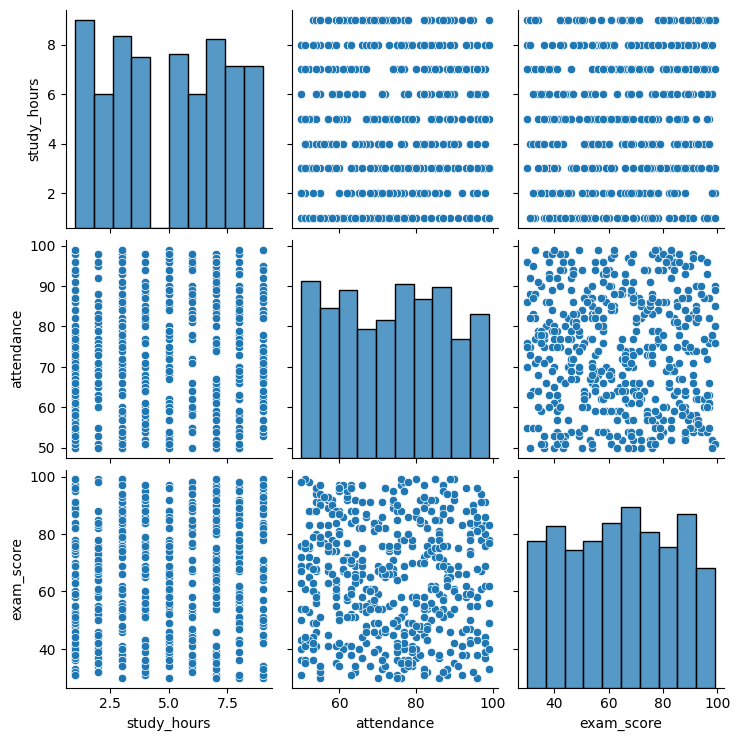

In [17]:
sns.pairplot(df[["study_hours", "attendance", "exam_score"]])
plt.show()

# Heatmap

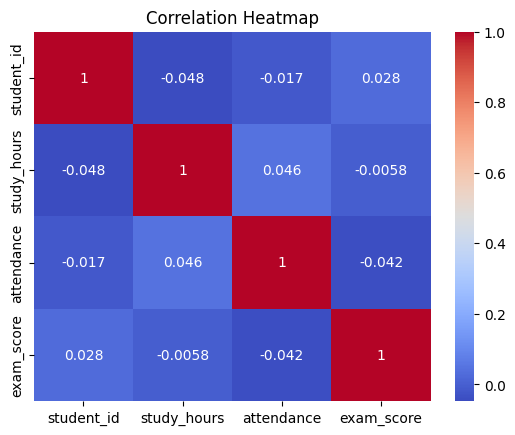

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot

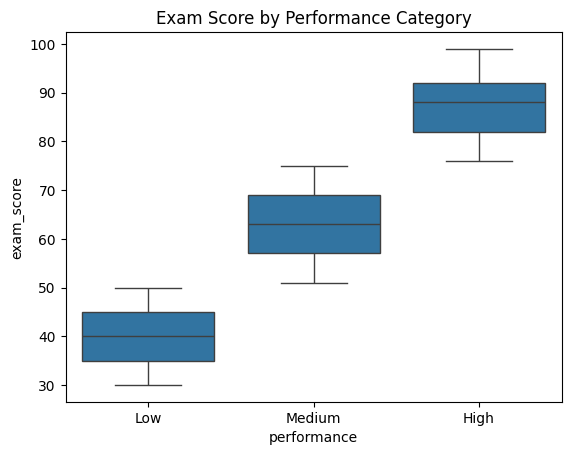

In [19]:
sns.boxplot(x="performance", y="exam_score", data=df)
plt.title("Exam Score by Performance Category")
plt.show()
 

# Line plot (sorted)

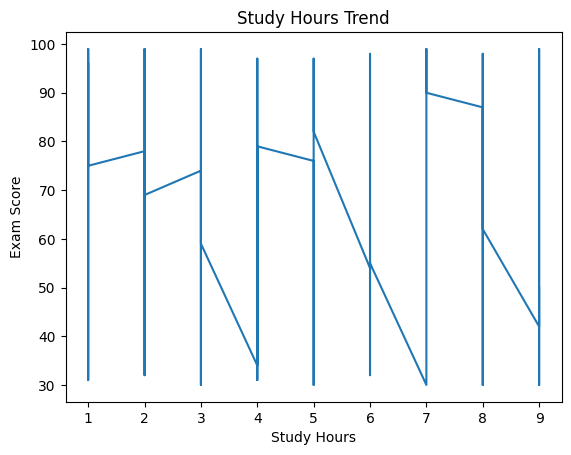

In [20]:
df_sorted = df.sort_values("study_hours")
plt.plot(df_sorted["study_hours"], df_sorted["exam_score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours Trend")
plt.show()

QUESTION 2: Employee Analytics

In [21]:
np.random.seed(10)

In [22]:
df = pd.DataFrame({
    "employee_id": range(1, 501),
    "experience_years": np.random.randint(0, 20, 500),
    "salary": np.random.randint(20000, 150000, 500),
    "performance_rating": np.random.randint(1, 6, 500),
    "department": np.random.choice(["IT", "HR", "Sales", "Finance"], 500)
})

# Inspection

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         500 non-null    int64 
 1   experience_years    500 non-null    int64 
 2   salary              500 non-null    int64 
 3   performance_rating  500 non-null    int64 
 4   department          500 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


In [26]:
df.describe(include = "all")

,employee_id,experience_years,salary,performance_rating,department
count,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,HR
freq,NaN,NaN,NaN,NaN,128
mean,250.500000,9.768000,85734.504000,2.974000,NaN
std,144.481833,5.896415,37764.998663,1.421748,NaN
min,1.000000,0.000000,20135.000000,1.000000,NaN
25%,125.750000,5.000000,53242.000000,2.000000,NaN
50%,250.500000,10.000000,86474.000000,3.000000,NaN
75%,375.250000,15.000000,118165.250000,4.000000,NaN


# GroupBy with multiple columns

In [27]:
df.groupby("department")["salary"].agg(["mean", "median", "max"])

,mean,median,max
department,,,
Finance,81765.471074,78103.0,149792
HR,89800.867188,94153.5,149927
IT,85814.166667,79562.5,149722
Sales,85332.272000,87230.0,149897


# Pivot table

In [28]:
pd.pivot_table(
    df,
    values="salary",
    index="department",
    columns="performance_rating",
    aggfunc="mean"
)

performance_rating,1,2,3,4,5
department,,,,,
Finance,82720.923077,76804.807692,83619.500000,82036.041667,84187.920000
HR,97866.692308,90268.281250,85418.960000,79886.210526,92618.461538
IT,90444.909091,79540.033333,91832.444444,79517.652174,88675.583333
Sales,85739.111111,102458.947368,89882.800000,75612.714286,78485.846154


# Ranking

In [37]:
df["salary_rank"] = df["salary"].rank(ascending=False)


# Conditional column

In [38]:
df["level"] = np.where(df["experience_years"] >= 10, "Senior", "Junior")

# Value counts

In [32]:
df["department"].value_counts(normalize=True)
 

department
HR         0.256
IT         0.252
Sales      0.250
Finance    0.242
Name: proportion, dtype: float64

Visualization

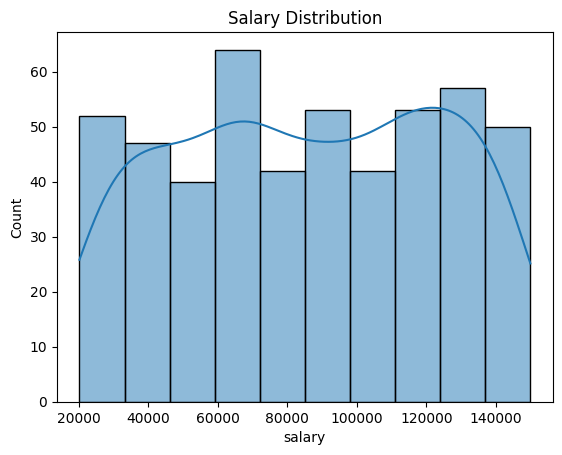

In [33]:
# Salary distribution
sns.histplot(df["salary"], kde=True)
plt.title("Salary Distribution")
plt.show()
 

# Experience vs Salary

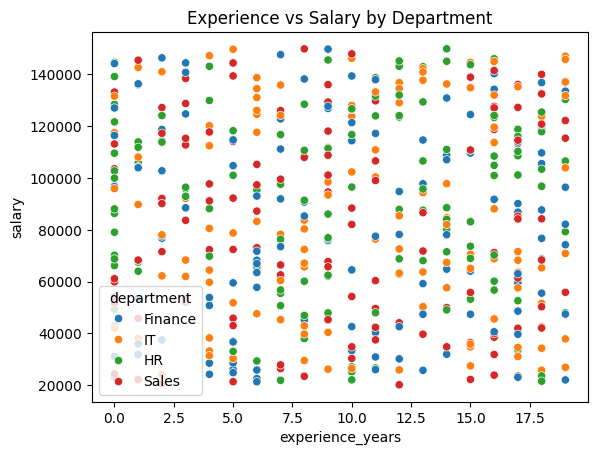

In [34]:
sns.scatterplot(x="experience_years", y="salary", hue="department", data=df)
plt.title("Experience vs Salary by Department")
plt.show()

# Bar plot

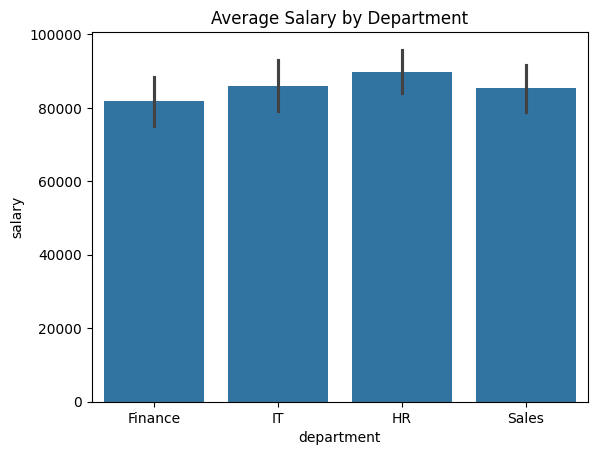

In [35]:
sns.barplot(x="department", y="salary", data=df)
plt.title("Average Salary by Department")
plt.show()

# Boxplot

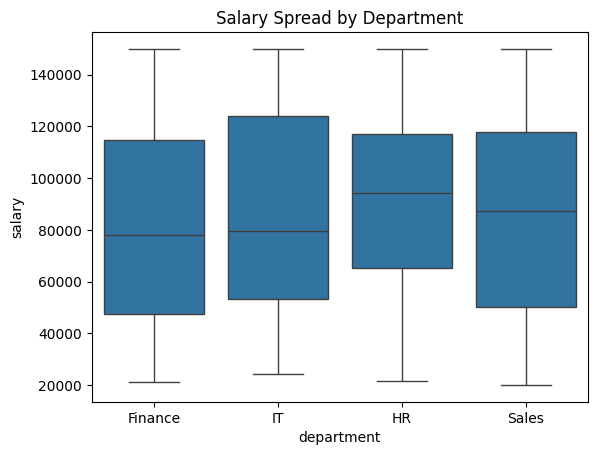

In [36]:
sns.boxplot(x="department", y="salary", data=df)
plt.title("Salary Spread by Department")
plt.show()

QUESTION 3: Sales & Customer Analytics

In [55]:
np.random.seed(5)
 
df = pd.DataFrame({
    "day": pd.date_range("2024-01-01", periods=500),
    "units_sold": np.random.randint(1, 60, 500),
    "price": np.random.randint(100, 1000, 500),
    "customer_rating": np.random.uniform(1, 5, 500)
})

# Basic inspection

In [56]:
df.head()

,day,units_sold,price,customer_rating
0,2024-01-01,36,945,2.284716
1,2024-01-02,15,773,1.865399
2,2024-01-03,48,676,1.699030
3,2024-01-04,39,999,3.207362
4,2024-01-05,55,450,3.558515


In [42]:
df.tail()

,day,units_sold,price,customer_rating
495,2025-05-10,14,705,1.477246
496,2025-05-11,52,375,2.003696
497,2025-05-12,10,843,4.988959
498,2025-05-13,42,732,4.898006
499,2025-05-14,6,227,4.577687


In [44]:
df.sample(5)

,day,units_sold,price,customer_rating
196,2024-07-15,2,309,1.434156
110,2024-04-20,17,800,2.455508
59,2024-02-29,50,227,2.824402
15,2024-01-16,13,751,4.747869
262,2024-09-19,50,597,1.185767


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   day              500 non-null    datetime64[ns]
 1   units_sold       500 non-null    int64         
 2   price            500 non-null    int64         
 3   customer_rating  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.8 KB


# statistical analysis

In [57]:
df.describe()

,day,units_sold,price,customer_rating
count,500,500.000000,500.000000,500.000000
mean,2024-09-06 12:00:00,28.440000,528.916000,2.961798
min,2024-01-01 00:00:00,1.000000,101.000000,1.004692
25%,2024-05-04 18:00:00,14.000000,293.250000,2.026971
50%,2024-09-06 12:00:00,28.000000,519.000000,3.023700
75%,2025-01-09 06:00:00,43.000000,747.000000,3.814543
max,2025-05-14 00:00:00,59.000000,999.000000,4.988959
std,NaN,17.017332,262.351905,1.118583


In [ ]:
df[["units_sold", "price", "customer_rating"]].mean()

units_sold          28.440000
price              528.916000
customer_rating      2.961798
dtype: float64

# Feature engineering

In [67]:
df["sales_category"] = pd.cut(
    df["units_sold"],
    bins=[0, 20, 40, 60],
    labels=["Low", "Medium", "High"]
)
df

,day,units_sold,price,customer_rating,sales_category
0,2024-01-01,36,945,2.284716,Medium
1,2024-01-02,15,773,1.865399,Low
2,2024-01-03,48,676,1.699030,High
3,2024-01-04,39,999,3.207362,Medium
4,2024-01-05,55,450,3.558515,High
...,...,...,...,...,...
495,2025-05-10,14,705,1.477246,Low
496,2025-05-11,52,375,2.003696,High
497,2025-05-12,10,843,4.988959,Low
498,2025-05-13,42,732,4.898006,High


# Group analysis

In [68]:
print(df.groupby("sales_category")[["price", "customer_rating"]].agg(["mean", "min", "max", "count"]))

                     price                 customer_rating            \
                      mean  min  max count            mean       min   
sales_category                                                         
Low             526.903061  102  995   196        3.010705  1.004692   
Medium          523.841463  126  999   164        2.959663  1.014408   
High            537.678571  101  998   140        2.895828  1.013937   

                                
                     max count  
sales_category                  
Low             4.988959   196  
Medium          4.906838   164  
High            4.976977   140  


/tmp/ipykernel_15446/424559208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("sales_category")[["price", "customer_rating"]].agg(["mean", "min", "max", "count"]))


# Filtering 

In [70]:
high_sales= df[(df["units_sold"] > 50) & (df["customer_rating"] > 2)]
print(high_sales.head())

          day  units_sold  price  customer_rating sales_category
4  2024-01-05          55    450         3.558515           High
31 2024-02-01          58    568         3.796484           High
49 2024-02-19          52    909         3.163108           High
60 2024-03-01          54    628         2.802288           High
70 2024-03-11          56    190         3.134715           High


# Sorting:

In [71]:
df["revenue"] = df["units_sold"] * df["price"]
top_revenue_days = df.sort_values("revenue", ascending=False).head(10)
print(top_revenue_days)

           day  units_sold  price  customer_rating sales_category  revenue
484 2025-04-29          59    939         1.728110           High    55401
477 2025-04-22          54    996         2.402540           High    53784
146 2024-05-26          59    904         1.073443           High    53336
242 2024-08-30          52    995         2.621890           High    51740
94  2024-04-04          55    939         3.580575           High    51645
374 2025-01-09          58    884         4.194120           High    51272
239 2024-08-27          50    998         2.029052           High    49900
362 2024-12-28          50    992         2.996056           High    49600
135 2024-05-15          50    974         2.320939           High    48700
345 2024-12-11          59    816         4.586948           High    48144


In [72]:
# Correlation
print(df.corr(numeric_only=True))

                 units_sold     price  customer_rating   revenue
units_sold         1.000000  0.004407        -0.019573  0.732714
price              0.004407  1.000000        -0.040101  0.577348
customer_rating   -0.019573 -0.040101         1.000000 -0.021546
revenue            0.732714  0.577348        -0.021546  1.000000


# Visualization

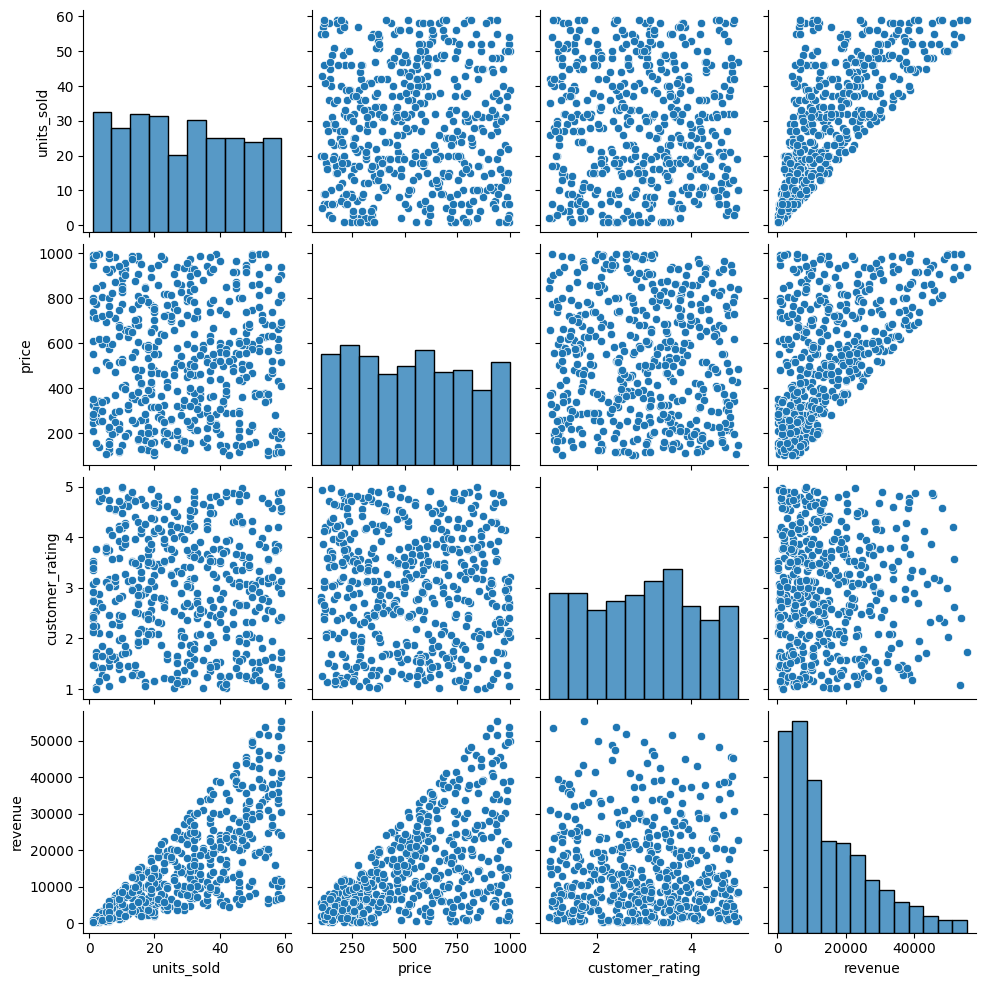

In [73]:
# Pairplot
sns.pairplot(df[["units_sold", "price", "customer_rating", "revenue"]])
plt.show()

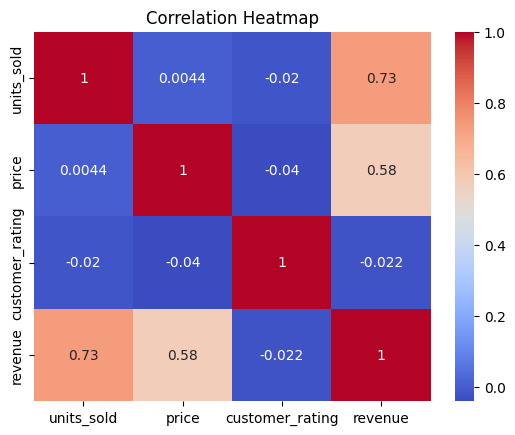

In [74]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

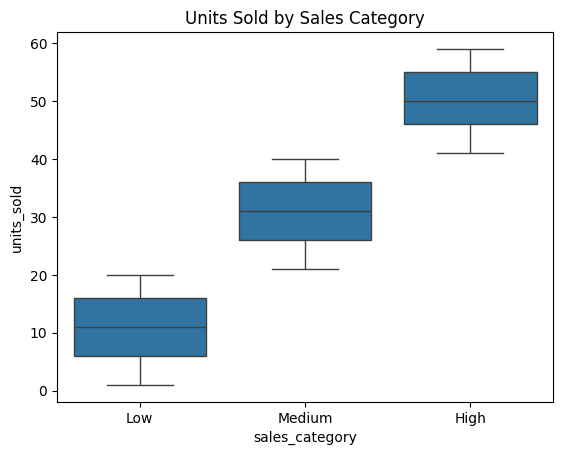

In [77]:
# Boxplot: Units sold by sales category
sns.boxplot(x="sales_category", y="units_sold", data=df)
plt.title("Units Sold by Sales Category")
plt.show()

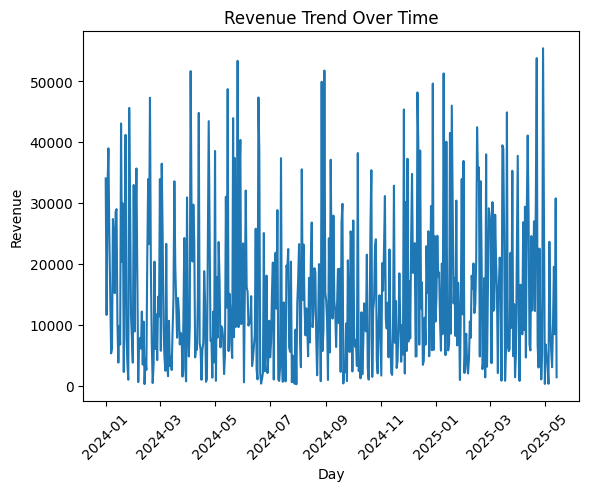

In [78]:
# Line plot: Trend of revenue over time
df_sorted = df.sort_values("day")
plt.plot(df_sorted["day"], df_sorted["revenue"])
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.show()